## Final Project Submission

Please fill out:
* Student name: Alvaro Henriquez
* Student pace: part time
* Scheduled project review date/time: 3/24/2020 @ 4:30 PM EST
* Instructor name: Victor Geislinger
* Blog post URL:https://medium.com/@alvarohenriquez_93558/adjusting-for-inflation-a-simple-method-a18694169789


# Analysis of the film industry: 
### What makes a film successful?

Load the required libraries

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

___

## inflation_adjust()

This function downloads a csv file that contains three columns - <i>year</i>, <i>amount</i>, and <i>inflation rate</i> and returns a dictionary. The values in the <i>amount</i> column are all equal in terms of '<i>buying power</i>'. In order to comvert the currency from any year to the equivalent in today' currency you first need to divide the value in the row for the current years value by the value from in the row for that year. The result will be the multiplier that will be use to calculate the adjusted value.The 2020 value when 1930 is $1.00 is $15.49.
    
   $multiplier=\frac{15.49}{value}$

Now you can multiply the value that you want to convert by the multiplier

$convertedvalue = valuetoconvert * multiplier$

You can get the file [here](https://www.in2013dollars.com/us/inflation/1930?amount=1![image.png](attachment:image.png)).

___

In [2]:
def inflation_adjust(file):
    '''Takes in a csv and returns a dictionary'''
    inflation_df = pd.read_csv(file)
    #Calculate the multiplier
    inflation_df.amount = round(15.49/inflation_df.amount,2)
    return dict(zip(list(inflation_df.year), list(inflation_df.amount)))

adjuster = inflation_adjust('inflation_data.csv')
 

___

This is the file that we will be working with. Download from Kaggle [here](https://www.kaggle.com/rounakbanik/the-movies-dataset).

___

In [3]:
movies_df = pd.read_csv('the-movies-dataset/movies_metadata.csv')

C:\Users\bigal\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


___


Let's get some basic info.

___

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

___

There are quite a few missing values, but mostly in columns that we will not use. Also, the '<i>budget</i>' column is of type object. We will need to cast it to a float.

___

In [5]:
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [6]:
movies_df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


___

We see alot of skewness in the data. 

___

In [7]:
movies_df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


___

Several columns contains json strings, including <i>genres</i>. We'll have to deal with that. But for now let's drop columns that we do not need.

___

In [8]:
# Drop uneeded columns
movies_df.drop(columns=['belongs_to_collection','homepage','poster_path','overview','tagline'], inplace=True)
movies_df.head(3)

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0


___

Check '<i>status</i>' to see what values the series contains.  Looks like we only need the '<i>Released</i>' column, so we'll remove the rows for movies which were not released.
    
___

In [9]:
movies_df.status.unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [10]:
drop_indexes = movies_df[movies_df.status!='Released'].index

movies_df.drop(drop_indexes, inplace=True)

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45014 entries, 0 to 45465
Data columns (total 19 columns):
adult                   45014 non-null object
budget                  45014 non-null object
genres                  45014 non-null object
id                      45014 non-null object
imdb_id                 44999 non-null object
original_language       45004 non-null object
original_title          45014 non-null object
popularity              45014 non-null object
production_companies    45014 non-null object
production_countries    45014 non-null object
release_date            44936 non-null object
revenue                 45014 non-null float64
runtime                 44763 non-null float64
spoken_languages        45014 non-null object
status                  45014 non-null object
title                   45014 non-null object
video                   45014 non-null object
vote_average            45014 non-null float64
vote_count              45014 non-null float64
dtypes: float

In [11]:
movies_df.isnull().sum()

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                  15
original_language        10
original_title            0
popularity                0
production_companies      0
production_countries      0
release_date             78
revenue                   0
runtime                 251
spoken_languages          0
status                    0
title                     0
video                     0
vote_average              0
vote_count                0
dtype: int64

___

Looking a lot better, there are still a few missing values. Since they aren't many, we'll remove '<i>release_date</i>' and '<i>imdb_id</i>'.

___

In [12]:
movies_df = movies_df.dropna(how='any', subset=['release_date','imdb_id'])

movies_df.isnull().sum()

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                   0
original_language        10
original_title            0
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                 238
spoken_languages          0
status                    0
title                     0
video                     0
vote_average              0
vote_count                0
dtype: int64

___

We'll impute '<i>runtime</i>' with the mean.

___

In [13]:
movies_df.runtime.fillna(movies_df.runtime.mean(), inplace=True)

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44924 entries, 0 to 45465
Data columns (total 19 columns):
adult                   44924 non-null object
budget                  44924 non-null object
genres                  44924 non-null object
id                      44924 non-null object
imdb_id                 44924 non-null object
original_language       44914 non-null object
original_title          44924 non-null object
popularity              44924 non-null object
production_companies    44924 non-null object
production_countries    44924 non-null object
release_date            44924 non-null object
revenue                 44924 non-null float64
runtime                 44924 non-null float64
spoken_languages        44924 non-null object
status                  44924 non-null object
title                   44924 non-null object
video                   44924 non-null object
vote_average            44924 non-null float64
vote_count              44924 non-null float64
dtypes: float

___

Okay, wo now we'll go ahead and cast budget as a float so that we can use it to calculate the profit and ROI. We'll go ahead and test the inflation adjuster dictionary on the first record. We will use '<i>release_date</i>' to get our key. since the date is represented as astring, we will need to parse it for the year using split(). Let's test it here.

___

In [14]:
movies_df.budget = movies_df.budget.astype(float)

#adjuster[key]*budget --> multiplier x budget - remember?
adjuster[int(movies_df.release_date[1].split('-')[0])]*movies_df.budget[1]

110500000.0

### adjust_for_inflation()

This is just a wrapper function that parses '<i>release_date</i>' for use with adjuster.

In [15]:
def adjust_for_inflation(x, column):
    '''Takes in the dataframe and column to adjust. Parses the date string before passing to adjuster'''
    date_str = str(x.release_date)
    year_str = date_str.split('-')[0]
    return round(adjuster[int(year_str)] * x[column],2)

___

### Time for some feature engineering.
We want to analyse only movies made since 1930, the year that sound became commonplace. So we iterate over the dataframe and remove them.

Next we'll divide <i>budget</i> and <i>revenue</i> by $10^6$, so that we can refer to the values inf million. This makes it easier to read the values. 

Now we'll create two new features <i>budget_in_2020\\$</i> and <i>revenue_in_2020\\$<i> which will hold the values for <i>budget</i> and <i>revenue</i> adjusted for inflation.
    
We also calculate the profit and ROI, and create the two columns to hold them.

___
$profit=revenue-budget$

$ROI=\frac{profit*100}{budget}$
___

In [16]:
#Let's remove movies from 1800's to 1920s.
for yr in ('18','190','191','192'):
    movies_df.drop(movies_df[movies_df['release_date'].str.startswith(yr)].index, inplace=True)

#Let's scale down the amounts to $1M units
movies_df['budget'] = movies_df['budget']/10**6
movies_df['revenue'] = movies_df['revenue']/10**6

#This is where we adjust for inflation
movies_df['budget_in_2020$'] = movies_df.apply(lambda x: adjust_for_inflation(x, 'budget'),axis=1)
movies_df['revenue_in_2020$'] = movies_df.apply(lambda x: adjust_for_inflation(x, 'revenue'),axis=1)

#And calculate profit and ROI
movies_df['profit'] = round((movies_df['revenue_in_2020$'] - movies_df['budget_in_2020$']),2)
movies_df['ROI'] = round(((movies_df['profit'])/movies_df['budget_in_2020$'])*100,2)

In [17]:
movies_df.head(3)

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,...,spoken_languages,status,title,video,vote_average,vote_count,budget_in_2020$,revenue_in_2020$,profit,ROI
0,False,30.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0,51.0,635.04,584.04,1145.18
1,False,65.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0,110.5,446.76,336.26,304.31
2,False,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0,0.0,0.00,0.00,NaN


___

We're going to exclude records for budgets under \\$1M dollars. According to this article on [parlaystudios.com](https://parlaystudios.com/blog/feature-film-budget-breakdown/) the average budget for a feature film is between \\$70M and \\$90M.  

___

In [18]:
df_gt_1M = movies_df[movies_df['budget_in_2020$'] > 1]
df_gt_1M.describe()

,budget,revenue,runtime,vote_average,vote_count,budget_in_2020$,revenue_in_2020$,profit,ROI
count,7700.000000,7700.000000,7700.000000,7700.000000,7700.000000,7700.000000,7700.000000,7700.000000,7700.000000
mean,24.886668,62.901615,107.965009,6.087234,532.392987,36.153431,98.704717,62.551286,174.409026
std,35.741702,144.965652,26.770720,1.081682,1091.509036,46.850442,243.415860,222.467455,896.859392
min,0.066260,0.000000,0.000000,0.000000,0.000000,1.010000,0.000000,-798.000000,-100.000000
25%,3.900000,0.000000,93.000000,5.500000,31.000000,6.267500,0.000000,-9.422500,-100.000000
50%,11.707789,8.756445,103.000000,6.200000,135.500000,19.185000,15.120000,-1.360000,-24.425000
75%,30.000000,58.859510,118.000000,6.800000,508.000000,45.600000,96.070000,54.222500,179.197500
max,380.000000,2787.965087,705.000000,10.000000,14075.000000,798.000000,7467.290000,7392.650000,31082.450000


___

Now to deal with the genres. You'll recall that the genres are stored as a list of dictionaries in the form of json strings. We're going to iterate over the dataframe, using json.loads to transform the strings into pythons lists. 

We then iterate over the list of list to get a list of the names of the genres for each movie. We create a set of the genre names, since the list of genres has duplicates.

We create a dictionary with genra names as keys and genre count as values.

___

In [19]:
#List of lists
lol_of_genres = list(df_gt_1M.apply(lambda x: json.loads(x[2].replace("'", '"')), axis=1))

#List of genres with duplicates
genres_list = [d['name'] for l in lol_of_genres for d in l]

#A set of genres - unique genre names
genres_set = set(genres_list)

#Dictionary {genre_name:genre_count}
genres_dict = dict(zip(genres_set,[0]*len(genres_set) ))

#Iterate over genre_list and increment genre counts
for g in genres_list: genres_dict[g] += 1
print(genres_dict)


{'Thriller': 2190, 'Comedy': 2459, 'Foreign': 81, 'Fantasy': 667, 'Action': 1981, 'Drama': 3689, 'Western': 133, 'Horror': 993, 'Family': 686, 'Science Fiction': 891, 'War': 300, 'Crime': 1161, 'Music': 266, 'TV Movie': 35, 'Animation': 380, 'Romance': 1324, 'Documentary': 89, 'Adventure': 1217, 'Mystery': 590, 'History': 355}


Now to do some analysis. We'll run several charts.

Text(0.5, 1.0, 'Total number by genre')

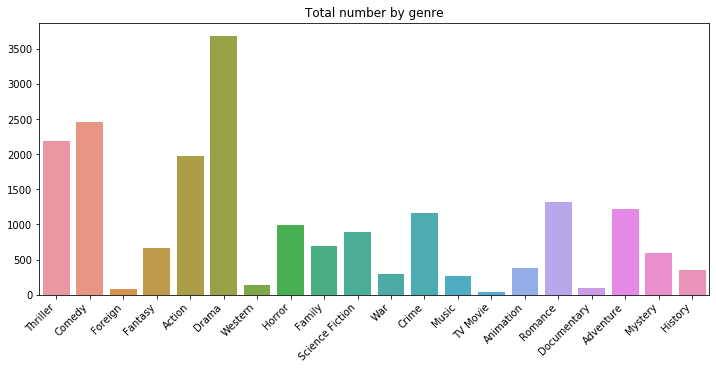

In [20]:
keys = genres_dict.keys()
values = genres_dict.values()
plt.figure(figsize=(12,5))
plt.xticks(rotation=45, horizontalalignment='right')
ax = sns.barplot(x=list(keys),y=list(values))
ax.set_title('Total number by genre')

### top_x(), top_by_genre()
These functions will allow us to filter the data for our charts.

In [21]:
def top_x(df,col,x):
    '''Takes a dataframe, a column, and an integer. 
    Returns the top x in descending order sorted by col'''
    return df.sort_values(by=col,ascending=False)[:x]

def top_by_genre(df,col,x,lst):
    '''Wraps top_x() to return count by genre'''
    return [top_x(df,col,x)['genres'].str.contains(gen).sum() for gen in list(lst)]

In [22]:
top_profit_by_genres = top_by_genre(df_gt_1M,'profit',100,keys)

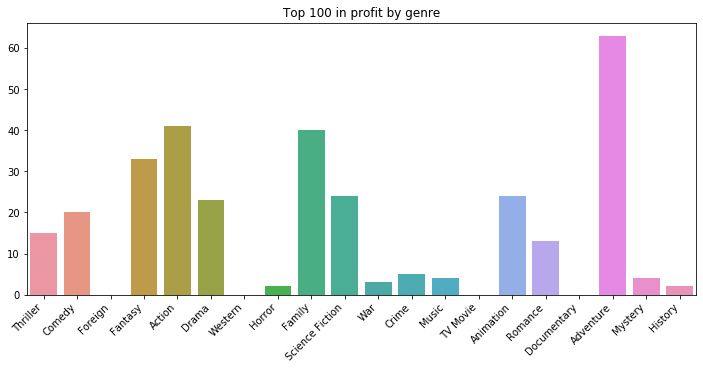

In [23]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45, horizontalalignment='right')
ax = sns.barplot(x=list(keys),y=top_profit_by_genres)
ax.set_title('Top 100 in profit by genre')
plt.savefig('Top 100 in profit by genre.png', dpi=300)

In [24]:
top_ROI_by_genres = top_by_genre(df_gt_1M,'ROI',100,keys)

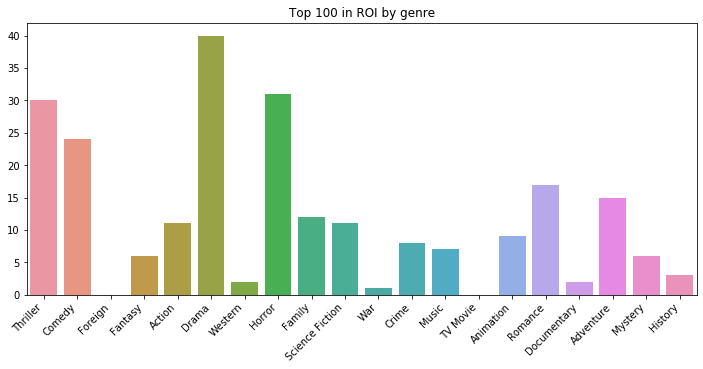

In [25]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45, horizontalalignment='right')
ax = sns.barplot(x=list(keys),y=top_ROI_by_genres)
ax.set_title('Top 100 in ROI by genre')
plt.savefig('Top 100 in ROI by genre.png', dpi=300)

In [26]:
top_runtime_by_genres =  top_by_genre(df_gt_1M,'runtime',100,keys)

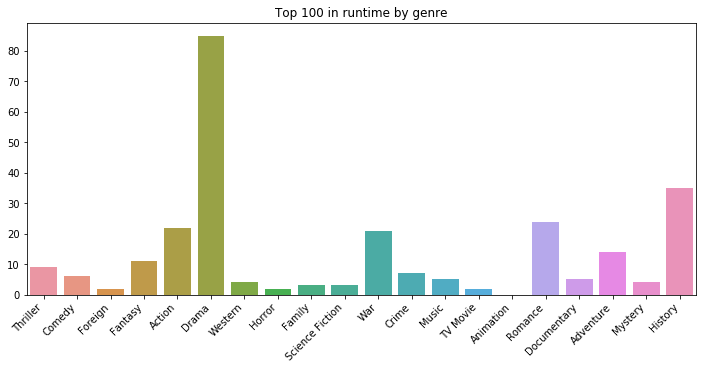

In [27]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45, horizontalalignment='right')
ax = sns.barplot(x=list(keys),y=top_runtime_by_genres)
ax.set_title('Top 100 in runtime by genre')
plt.savefig('Top 100 in runtime by genre.png', dpi=300)

Found this function on [stackoverflow](https://stackoverflow.com/questions/24290025/python-enumerate-downwards-or-with-a-custom-step). Perfect for my solution where I need to plot two chart through each iteration of the for loop. 

In [28]:
#enumerates with option for steps.
def enumerate2(xs, start=0, step=1):
    for x in xs:
        yield (start, x)
        start += step

__

This code will plot a pair of bar charts (ROI and profit) by genre for each 20 year span. This allows us to examine the performance of each genre over time.

___

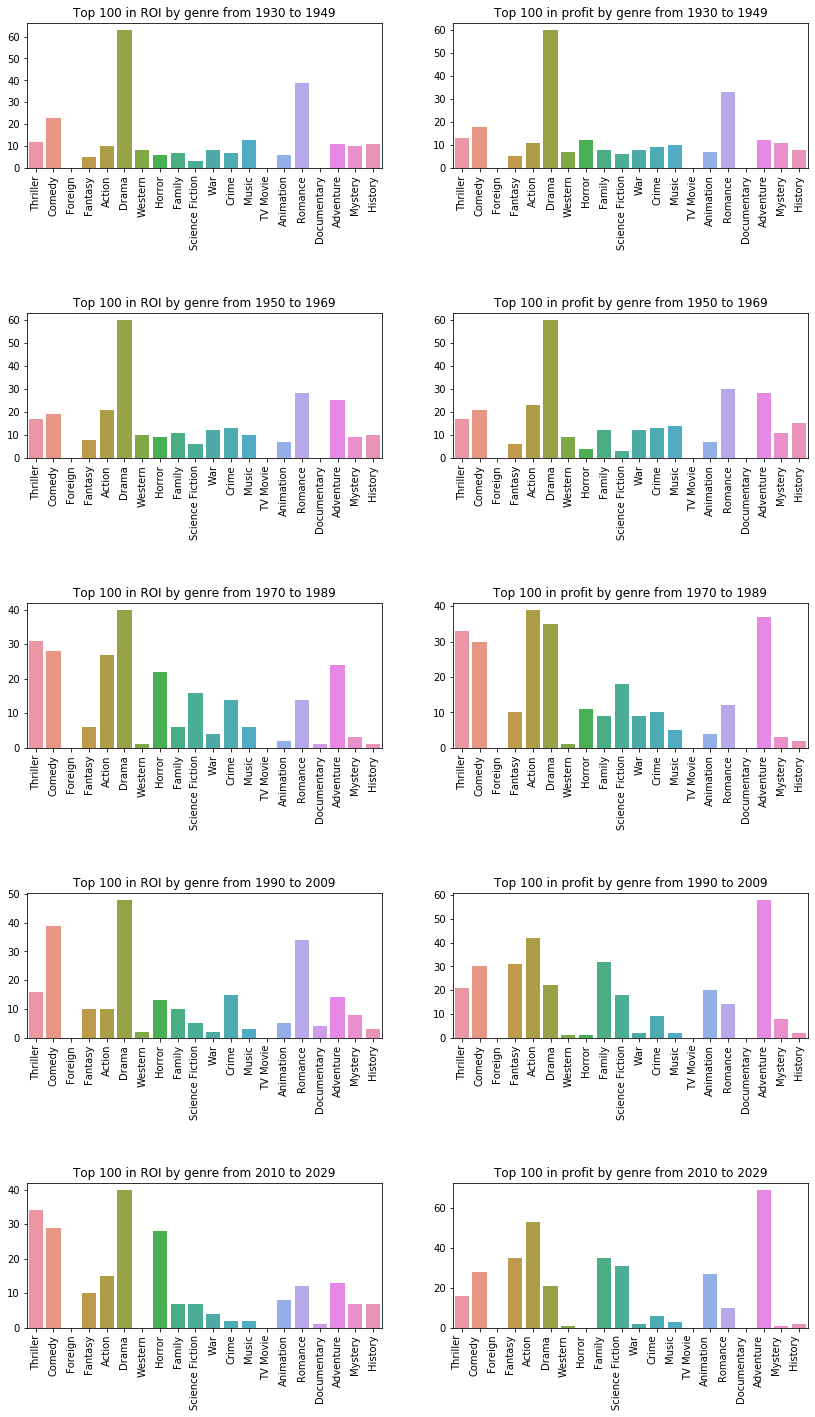

In [31]:

fig,ax = plt.subplots(figsize=(14,24), ncols=2, nrows=5)
plt.subplots_adjust(hspace=1)
plt.xticks(rotation=45, horizontalalignment='right')

x = 100 #This is the 'x' in 'top_x'
#List of strings used for filtering two decades spans from the df 
years = ['193|194','195|196','197|198','199|200','201|202']
for i,yr in enumerate2(years, step=2):    
    ndf = df_gt_1M[df_gt_1M['release_date'].str.contains(str(yr))]
    tail = yr.split('|')
    tail[0] += '0'  #complete the year - '193' becomes '1930'
    tail[1] += '9'  #ditto
    
    top = top_by_genre(ndf,'ROI',x,keys)
    sns.barplot(x=list(keys),y=top, ax=ax[i//2][i%2] )
    ax[i//2][i%2].set_xticklabels(labels=list(keys), rotation=90)
    ax[i//2][i%2].set_title(f'Top {x} in ROI by genre from {tail[0]} to {tail[1]}')
    
    i+=1
    top = top_by_genre(ndf,'profit',x,keys)
    sns.barplot(x=list(keys),y=top, ax=ax[i//2][i%2] )
    ax[i//2][i%2].set_xticklabels(labels=list(keys), rotation=90)
    ax[i//2][i%2].set_title(f'Top {x} in profit by genre from {tail[0]} to {tail[1]}')
    
plt.savefig('Top {x} in a 20 year span.png', dpi=300)
